In [1]:
#!/usr/bin/env python

import sys
import time
from pathlib import Path
from collections import defaultdict

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine

In [2]:
start_time = time.time()
# Script to compute similarity matrices for subregion electrostatics of each PDB. Will need to plot them too. Hmmm -> matrix heatmap.

## Load the data ##

pdbs = []
potentials = {}
data_folder = Path('data')
with open(data_folder / 'all_spike_strs_regions_pot.csv', 'r') as f:
    header = next(f).split(',')
    print('column names:', header)
    data = defaultdict(dict)
    for line in f:
        mm = line.split(',')

        if len(mm) == 3:
            key_AG, key_region, potential = mm
            # key_region = int(key_region.split['_'][-1]) # transform region key to int?
            data[key_AG].update({key_region: float(potential)})

data = dict(data)

column names: ['PDB ID', ' Region within RBD', ' Delphi Electrostatic Potential\n']


In [3]:
import pandas as pd
df = pd.DataFrame(data).T
df

,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,...,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,region_20,region_21
2dd8,-70.191115,39.068191,78.750559,95.703496,70.879241,-76.449713,0.000000,93.516598,-55.845547,-121.090888,...,-1.083614,75.810597,131.833181,69.729486,31.898551,22.288216,-3.203085,-13.742084,NaN,NaN
2ghw,-106.785507,19.609688,-1.795815,-39.132425,44.017062,-105.506540,0.000000,-42.881587,11.830961,-111.973462,...,-61.256166,64.853937,-3.509490,-7.347929,-30.154394,3.018089,5.173115,NaN,NaN,NaN
4f2m,-104.913528,40.581253,132.354564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4xak,-170.187825,8.002645,-10.362026,32.489331,-83.017622,0.000000,0.000000,22.325005,-15.002110,24.087360,...,2.597925,-87.052227,-130.716816,-51.104001,NaN,NaN,NaN,NaN,NaN,NaN
4zpt,-116.596861,39.728958,-109.296683,54.022448,-47.795527,0.000000,0.000000,12.374975,-6.511433,39.365383,...,23.294556,-70.729916,-43.711976,13.113535,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7ora,119.528058,65.582112,62.251735,-115.629936,92.654731,-24.808859,0.000000,56.913905,-14.503087,-89.224984,...,-161.690621,44.405440,41.702589,48.555987,-121.849770,-71.586651,-10.086030,52.540947,NaN,NaN
7orb,-64.065729,61.911957,77.064877,-64.943340,12.360914,-85.277850,-59.660744,9.026050,22.382662,-104.342434,...,128.764396,14.050218,1.254457,-28.472693,-33.796958,19.477023,8.134585,NaN,NaN,NaN
7r6w,-67.150572,116.221509,4.690351,-129.235458,-5.786718,-54.351238,0.000000,64.983853,14.631888,-107.456273,...,0.033576,5.749872,4.985055,-43.865304,-220.855610,36.621550,50.967934,-24.928986,NaN,NaN
7r6x,-34.064129,-116.646085,-3.236060,-79.870917,-35.885819,29.373127,71.473550,0.000000,28.990869,47.648078,...,-1.956275,-51.736143,127.173992,-49.092249,-56.133036,-65.851328,16.456864,-28.196962,-46.13797,NaN


Only a 98 have 21 regions defined: 

In [4]:
df.notna().sum(axis=1).value_counts().sort_index(ascending=False)

21    98
20    11
19    71
18    24
17     3
16     3
15     6
14     1
6      1
3      3
dtype: int64

In [5]:
df = df.loc[:,'region_1':'region_19'].dropna()
df

,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19
2dd8,-70.191115,39.068191,78.750559,95.703496,70.879241,-76.449713,0.000000,93.516598,-55.845547,-121.090888,-55.056374,-1.083614,75.810597,131.833181,69.729486,31.898551,22.288216,-3.203085,-13.742084
6nb3,-37.007494,38.017644,0.000000,-64.447512,13.548643,-24.700141,-61.442738,39.701019,-9.367816,7.047386,-14.863848,0.000000,0.000000,-14.829590,-4.907621,-24.906685,20.196743,91.989530,-92.915405
6nb4,-39.309666,4.351932,-8.529892,-58.231302,4.455779,-24.904879,-70.019377,-15.160095,-88.910999,13.506284,-15.719269,0.000000,0.000000,-15.353076,2.676513,6.772544,41.345764,80.547941,-34.812359
6nb7,29.718320,17.444863,17.196672,50.635741,23.528359,16.992476,0.000000,-10.101497,3.839521,-4.793793,34.855273,43.327603,-9.240390,-7.107809,0.339340,-3.329914,23.550809,0.000000,3.704321
6w41,-90.893641,14.399703,30.865509,-85.981540,61.089244,-123.459885,0.000000,50.430558,15.612831,-97.070642,-15.768311,21.918232,13.422039,-21.970479,-53.922472,-80.447720,19.941462,-29.322873,43.928083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7nxb,-94.261444,23.362303,30.476785,-54.796657,34.970523,-6.155750,0.000000,62.473588,-40.614427,-78.512340,-14.501288,174.412506,10.463200,35.922769,-59.087643,38.993451,-42.428836,-27.071708,39.985719
7or9,-37.943660,53.348451,58.452927,-16.246046,8.174506,59.472792,0.000000,40.229867,11.829867,-92.693257,14.186120,93.620443,-5.596717,95.539676,-52.970633,-193.779768,31.911615,31.764743,33.683234
7ora,119.528058,65.582112,62.251735,-115.629936,92.654731,-24.808859,0.000000,56.913905,-14.503087,-89.224984,-11.822923,-161.690621,44.405440,41.702589,48.555987,-121.849770,-71.586651,-10.086030,52.540947
7r6w,-67.150572,116.221509,4.690351,-129.235458,-5.786718,-54.351238,0.000000,64.983853,14.631888,-107.456273,-8.481619,0.033576,5.749872,4.985055,-43.865304,-220.855610,36.621550,50.967934,-24.928986


continue with remaining complete list of antigens

In [6]:
def lower_triangle(df):
    """Compute the correlation matrix, returning only unique values."""
    lower_triangle = pd.DataFrame(
        np.tril(np.ones(df.shape), -1)).astype(bool)
    lower_triangle.index, lower_triangle.columns = df.index, df.columns
    return df.where(lower_triangle)

In [7]:
dict_dist= {}
metrics = ['cosine', 'euclidean', 'l2', 'manhattan', 'l1', 'hamming', 'chebyshev'] # 'jaccard' excluded as it's for binary data
for _metric in metrics:
    dict_dist[_metric] = pd.DataFrame(pairwise_distances(X=df, metric=_metric), index=df.index, columns=df.index)
    dict_dist[_metric] = lower_triangle(dict_dist[_metric]).stack()
df_metrics = pd.DataFrame(dict_dist)
df_metrics

cosine   euclidean          l2    manhattan           l1  \
6nb3 2dd8  0.938914  342.306553  342.306553  1243.739490  1243.739490   
6nb4 2dd8  0.976647  344.053933  344.053933  1250.615352  1250.615352   
     6nb3  0.259524  125.702792  125.702792   340.787346   340.787346   
6nb7 2dd8  0.951805  313.103857  313.103857  1133.393273  1133.393273   
     6nb3  1.266582  222.754432  222.754432   736.340576   736.340576   
...             ...         ...         ...          ...          ...   
7r6x 7nxa  1.085743  424.789662  424.789662  1543.779197  1543.779197   
     7nxb  0.916548  384.750086  384.750086  1430.824919  1430.824919   
     7or9  0.839519  385.939161  385.939161  1326.726736  1326.726736   
     7ora  0.984735  449.786647  449.786647  1714.610068  1714.610068   
     7r6w  0.915995  431.170392  431.170392  1406.534169  1406.534169   

            hamming   chebyshev  
6nb3 2dd8  1.000000  160.151009  
6nb4 2dd8  1.000000  153.934798  
     6nb3  0.894737   79.543183  
6nb7 2dd8  0.947368  138.940990  
     6nb3  1.000000  115.083253  
...             ...         ...  
7r6x 7nxa  1.000000  191.534638  
     7nxb  1.000000  176.368781  
     7or9  1.000000  194.346473  
     7ora  1.000000  182.228197  
     7r6w  1.000000  232.867594  

[16110 rows x 7 columns]

## Normalization

$ z = \frac{x - min(X)}{max(X)-min(X)}$

where
- $x$: a single correlation value of a metric
- $X$: the set of correlations for a single metric
- $z$: a singe *normalized* correlation value of a metric


In [8]:
stats_metrics = df_metrics.describe()
stats_metrics

,cosine,euclidean,l2,manhattan,l1,hamming,chebyshev
count,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000
mean,0.787432,310.221727,310.221727,1034.736348,1034.736348,0.976977,170.330834
std,0.321897,101.459256,101.459256,344.215284,344.215284,0.026261,63.373186
min,0.059552,47.852609,47.852609,131.310984,131.310984,0.789474,26.415275
25%,0.525211,229.338889,229.338889,757.016827,757.016827,0.947368,121.929066
50%,0.796870,313.036724,313.036724,1043.367139,1043.367139,1.000000,165.565297
75%,1.028001,380.974781,380.974781,1273.013797,1273.013797,1.000000,210.238288
max,1.792749,755.350652,755.350652,2414.806790,2414.806790,1.000000,508.762881


In [9]:
X_min = stats_metrics.loc['min']
X_max = stats_metrics.loc['max']

In [10]:
df_metrics_normalized = (df_metrics - X_min) / (X_max - X_min)
df_metrics_normalized

cosine  euclidean        l2  manhattan        l1  hamming  \
6nb3 2dd8  0.507364   0.416190  0.416190   0.487160  0.487160     1.00   
6nb4 2dd8  0.529135   0.418660  0.418660   0.490171  0.490171     1.00   
     6nb3  0.115378   0.110036  0.110036   0.091735  0.091735     0.50   
6nb7 2dd8  0.514802   0.374914  0.374914   0.438837  0.438837     0.75   
     6nb3  0.696418   0.247212  0.247212   0.264958  0.264958     1.00   
...             ...        ...       ...        ...       ...      ...   
7r6x 7nxa  0.592080   0.532775  0.532775   0.618555  0.618555     1.00   
     7nxb  0.494459   0.476181  0.476181   0.569090  0.569090     1.00   
     7or9  0.450016   0.477862  0.477862   0.523502  0.523502     1.00   
     7ora  0.533801   0.568106  0.568106   0.693366  0.693366     1.00   
     7r6w  0.494140   0.541793  0.541793   0.558452  0.558452     1.00   

           chebyshev  
6nb3 2dd8   0.277260  
6nb4 2dd8   0.264373  
     6nb3   0.110144  
6nb7 2dd8   0.233288  
     6nb3   0.183826  
...              ...  
7r6x 7nxa   0.342324  
     7nxb   0.310883  
     7or9   0.348154  
     7ora   0.323030  
     7r6w   0.428016  

[16110 rows x 7 columns]

## Plotting the mean metrics heatmap

In [11]:
mean_metrics = df_metrics_normalized.mean(axis=1).unstack()
mean_metrics

,2dd8,6nb3,6nb4,6nb7,6w41,6wpt,6xc2,6xc3,6xc4,6xc7,...,7ntc,7nx6,7nx7,7nx8,7nx9,7nxa,7nxb,7or9,7ora,7r6w
6nb3,0.513047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6nb4,0.515882,0.161295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6nb7,0.446513,0.414940,0.409284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6w41,0.436224,0.415859,0.443209,0.434501,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6wpt,0.460792,0.555390,0.570292,0.341796,0.556236,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7nxb,0.431988,0.475020,0.475415,0.403529,0.331983,0.534881,0.542892,0.487862,0.431400,0.555125,...,0.502107,0.290156,0.413294,0.422637,0.356174,0.203887,NaN,NaN,NaN,NaN
7or9,0.494605,0.473096,0.529602,0.404146,0.386286,0.525849,0.344360,0.365496,0.347068,0.339269,...,0.584837,0.327335,0.292960,0.308675,0.277283,0.448338,0.409024,NaN,NaN,NaN
7ora,0.512148,0.531342,0.574081,0.534236,0.447513,0.596173,0.554257,0.481989,0.547398,0.383657,...,0.612720,0.530363,0.543363,0.533987,0.415689,0.603231,0.586751,0.504975,NaN,NaN
7r6w,0.536790,0.408615,0.483682,0.512078,0.312302,0.638401,0.354053,0.264829,0.259102,0.346291,...,0.688415,0.402435,0.344928,0.322012,0.359139,0.543884,0.489473,0.308080,0.446543,NaN


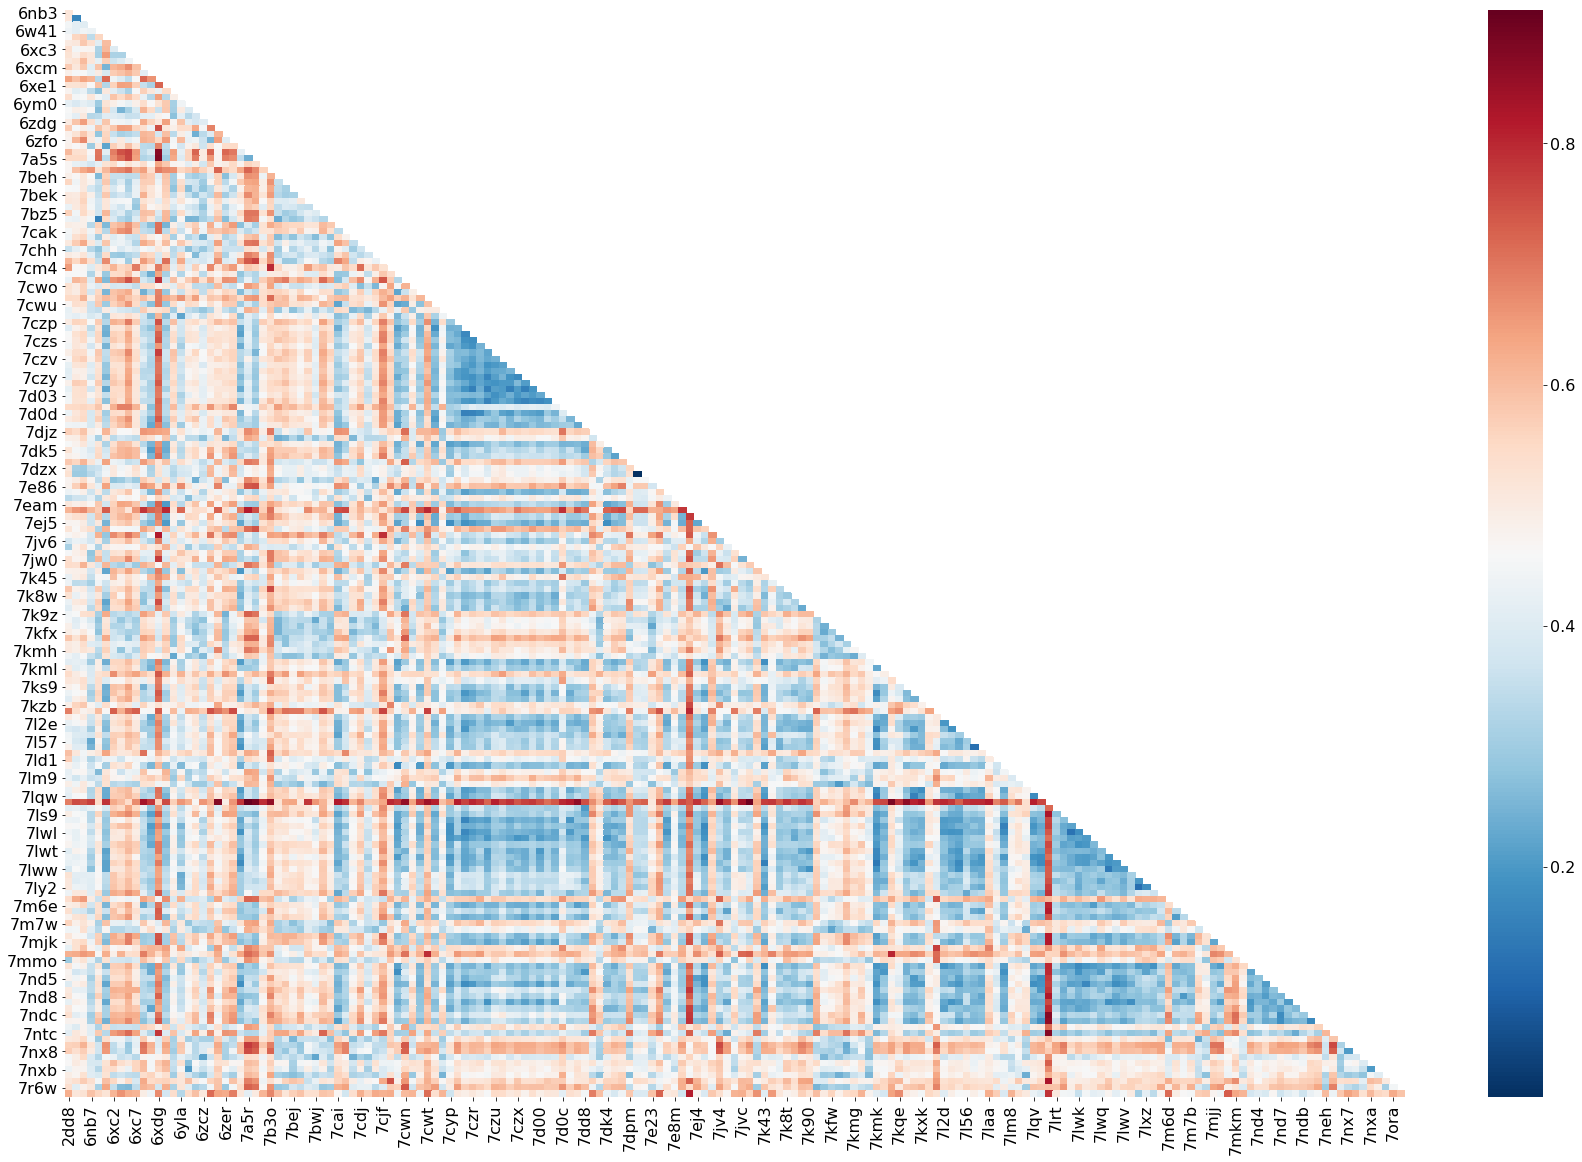

In [12]:
# Set up the matplotlib figure
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)

fig, ax = plt.subplots(figsize=(30,20)) 

ax = sns.heatmap(mean_metrics, annot=False, cmap="RdBu_r", ax=ax) #annot=labels, fmt='',annot_kws={"size": 14}, cmap="RdBu_r") #fmt="0.2f",  cmap="RdBu_r")